In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
Febrer_2019 = pd.read_csv('EnquestesFebrer2019.csv', sep=';', header=0, encoding='latin-1')
Febrer_2019.head()

,REGISTRO,ENTREVISTADOR,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,TELEFONO,ID_CONTACTO,ESTADO,...,PREFER_POLITIC,ID_IDEOLOGIA,IDEOLOGIA,ID_PERTINEN,PERTINEN,ID_ESTUDIS,ESTUDIS,ID_OCUPACIO,OCUPACIO,CP
0,4,"GUILLEM MILIAN, LAUREANO",2/13/2019,15:19:21,2/13/2019,16:30:57,389,698204715,4371986,Finalizada,...,Pablo Casado,3,Centro,5,Únicamente de su comunidad,2,Obligatorios,1,Trabajador,28053
1,5,"YUSTE ALARCON, MONTSERRAT",2/13/2019,15:19:42,2/13/2019,17:35:54,275,639346200,4372758,Finalizada,...,Albert Rivera,3,Centro,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28017
2,6,"OVIEDO HEREDIA, THAIS",2/13/2019,15:20:04,2/13/2019,17:29:01,377,609722733,4367939,Finalizada,...,Ninguno de estos,98,No sabe,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28043
3,27,"RIOS GONZALEZ, ANGEL",2/13/2019,15:25:19,2/13/2019,15:29:26,243,604021525,4370221,Finalizada,...,Pablo Casado,4,Centro derecha,3,Tan español como de su comunidad,4,Postobligatorios profesionales,1,Trabajador,36001
4,28,"YUSTE ALARCON, MONTSERRAT",2/13/2019,15:25:34,2/13/2019,15:32:08,392,640806079,4389758,Finalizada,...,Pedro Sánchez,3,Centro,5,Únicamente de su comunidad,2,Obligatorios,1,Trabajador,28021


In [3]:
Abril_2019 = pd.read_csv('EnquestesAbril2019.csv', sep=';', header=0, encoding='latin-1')
Abril_2019.head()

,ESTUDIO,ENTREVISTADOR,REGISTRO,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,TELEFONO,ID_CONTACTO,...,PREFER_POLITIC,ID_IDEOLOGIA,IDEOLOGIA,ID_PERTINEN,PERTINEN,ID_ESTUDIS,ESTUDIS,ID_OCUPACIO,OCUPACIO,CP
0,1179_EPE_ABRIL,"ALCANTARA VAZQUEZ, ESTHER",62,04/01/2019,12:53:51,04/01/2019,18:07:30,351,616370419,4593749,...,Albert Rivera,3,Centro,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,23660
1,1179_EPE_ABRIL,"ALCANTARA VAZQUEZ, ESTHER",63,04/01/2019,12:53:58,04/01/2019,12:59:53,351,654848064,4643391,...,Pedro Sánchez,1,Izquierda,3,Tan español como de su comunidad,5,Universitarios,5,Parado,46730
2,1179_EPE_ABRIL,"PERALES MELUS, M. CARMEN",65,04/01/2019,12:54:23,04/01/2019,18:05:32,283,636314067,4598448,...,Albert Rivera,4,Centro derecha,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28805
3,1179_EPE_ABRIL,"HERNANDEZ GOMEZ, SORAYA",70,04/01/2019,12:54:47,04/01/2019,12:59:13,260,626530536,4627226,...,Pablo Iglesias,1,Izquierda,98,No sabe,3,Postobligatorios,6,"Jubilado, pensionista",20302
4,1179_EPE_ABRIL,"GIRALDEZ PALACIOS, CRISTINA",82,04/01/2019,12:56:14,04/01/2019,13:00:39,259,649819027,4614667,...,Pablo Casado,4,Centro derecha,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,38007


In [4]:
Febrer_2019.index

RangeIndex(start=0, stop=1000, step=1)

In [5]:
Abril_2019.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
Febrer_2019.describe()

,REGISTRO,DURACION,TELEFONO,ID_CONTACTO,ID_AUT,ID_HABI,CMUNI,ID_SEXE,EDAT,ID_EDATCOD,...,ID_CONEIX_IGLESIAS,VAL_IGLESIAS,ID_CONEIX_ABASCAL,VAL_ABASCAL,ID_PREFER_POLITIC,ID_IDEOLOGIA,ID_PERTINEN,ID_ESTUDIS,ID_OCUPACIO,CP
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,...,1000.000000,993.000000,1000.000000,871.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,3015.687000,313.529000,7.344907e+08,4.388783e+06,8.285000,2.37200,55923.007000,1.51000,50.390000,2.80300,...,1.007000,5.554884,1.129000,9.421355,24.323000,11.621000,6.44400,3.632000,3.440000,30956.864000
std,1938.960031,100.230461,1.389571e+08,1.210661e+04,4.712322,0.98009,47190.527603,0.50015,16.208227,1.03405,...,0.083414,14.260228,0.335368,24.347871,39.074538,28.111699,18.54278,1.283832,3.994541,23465.081219
min,4.000000,110.000000,6.002043e+08,4.367393e+06,1.000000,1.00000,1.000000,1.00000,18.000000,1.00000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1004.000000
25%,1366.750000,251.000000,6.351688e+08,4.378338e+06,4.000000,2.00000,91.000000,1.00000,38.000000,2.00000,...,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.00000,2.000000,1.000000,12455.000000
50%,2947.500000,291.000000,6.665123e+08,4.388836e+06,9.000000,2.00000,99995.000000,2.00000,50.000000,3.00000,...,1.000000,4.000000,1.000000,2.000000,4.000000,3.000000,3.00000,4.000000,1.000000,28310.000000
75%,4595.750000,351.250000,9.223462e+08,4.399754e+06,12.000000,3.00000,99995.000000,2.00000,62.000000,4.00000,...,1.000000,5.000000,1.000000,6.000000,14.000000,4.000000,3.00000,5.000000,6.000000,41013.000000
max,6974.000000,1205.000000,9.882715e+08,4.409255e+06,19.000000,4.00000,99995.000000,2.00000,94.000000,4.00000,...,2.000000,99.000000,2.000000,99.000000,99.000000,99.000000,99.00000,5.000000,99.000000,99999.000000


In [7]:
Abril_2019.describe()

,REGISTRO,DURACION,TELEFONO,ID_CONTACTO,ID_AUT,ID_HABI,CMUNI,ID_SEXE,EDAT,ID_EDATCOD,...,VAL_RIVERA,VAL_SANCHEZ,VAL_IGLESIAS,VAL_ABASCAL,ID_PREFER_POLITIC,ID_IDEOLOGIA,ID_PERTINEN,ID_ESTUDIS,ID_OCUPACIO,CP
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,989.000000,998.000000,995.000000,885.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4317.138000,347.596000,7.114492e+08,4.620349e+06,8.284000,2.349000,63933.233000,1.514000,49.764000,2.771000,...,8.037412,7.587174,7.278392,8.183051,20.997000,10.79800,6.726000,3.678000,3.457000,31416.353000
std,3418.627706,100.929885,1.256962e+08,1.658511e+04,4.702069,0.989028,38562.124797,0.500054,16.398391,1.040982,...,17.976864,16.472156,18.080634,22.693022,36.635299,27.04031,19.247321,3.287114,4.017747,24066.914162
min,62.000000,155.000000,6.000782e+08,4.592034e+06,1.000000,1.000000,1059.000000,1.000000,18.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1003.000000
25%,1313.500000,278.750000,6.309790e+08,4.606175e+06,4.000000,2.000000,28079.000000,1.000000,38.000000,2.000000,...,3.000000,3.000000,1.000000,0.000000,2.000000,1.00000,2.000000,2.000000,1.000000,13287.500000
50%,3122.500000,327.000000,6.588524e+08,4.620460e+06,9.000000,2.000000,99995.000000,2.000000,50.000000,3.000000,...,5.000000,5.000000,4.000000,2.000000,4.000000,2.00000,3.000000,4.000000,1.000000,28360.000000
75%,7888.750000,392.000000,6.923855e+08,4.634422e+06,12.000000,3.000000,99995.000000,2.000000,62.000000,4.000000,...,7.000000,7.000000,6.000000,5.000000,5.000000,4.00000,3.000000,5.000000,6.000000,41019.250000
max,10803.000000,1336.000000,9.884713e+08,4.649592e+06,19.000000,4.000000,99995.000000,2.000000,92.000000,4.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99999.000000


In [8]:
Febrer_2019.dtypes

REGISTRO                int64
ENTREVISTADOR          object
FECHAINI               object
HORAINI                object
FECHAFIN               object
HORAFIN                object
DURACION                int64
TELEFONO                int64
ID_CONTACTO             int64
ESTADO                 object
TIP_TEL                object
CPROV                  object
ID_AUT                  int64
AUT                    object
ID_HABI                 int64
HABI                   object
CMUNI                   int64
NMUNI                  object
ID_SEXE                 int64
SEXE                   object
EDAT                    int64
ID_EDATCOD              int64
EDATCOD                object
ID_IMP_ELEC             int64
IMP_ELEC               object
ID_PROB_VOT_GEN         int64
PROB_VOT_GEN           object
ID_INT_GEN              int64
INT_GEN                object
ID_SIMP_GEN           float64
                       ...   
ID_INT_SIMP_GEN         int64
INT_SIMP_GEN           object
ID_REC_GEN

In [9]:
Abril_2019.dtypes

ESTUDIO                object
ENTREVISTADOR          object
REGISTRO                int64
FECHAINI               object
HORAINI                object
FECHAFIN               object
HORAFIN                object
DURACION                int64
TELEFONO                int64
ID_CONTACTO             int64
ESTADO                 object
TIP_TEL                object
ID_AUT                  int64
AUT                    object
ID_HABI                 int64
HABI                   object
CMUNI                   int64
ID_SEXE                 int64
SEXE                   object
EDAT                    int64
ID_EDATCOD              int64
EDATCOD                object
ID_IMP_ELEC             int64
IMP_ELEC               object
ID_PROB_VOT_GEN         int64
PROB_VOT_GEN           object
ID_INT_GEN              int64
INT_GEN                object
ID_SIMP_GEN           float64
SIMP_GEN               object
ID_INT_SIMP_GEN         int64
INT_SIMP_GEN           object
ID_REC_GEN              int64
REC_GEN   

### Vamos a eliminar las columnas que no necesitamos

In [10]:
Febrer_2019.columns

Index(['REGISTRO', 'ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN',
       'HORAFIN', 'DURACION', 'TELEFONO', 'ID_CONTACTO', 'ESTADO', 'TIP_TEL',
       'CPROV', 'ID_AUT', 'AUT', 'ID_HABI', 'HABI', 'CMUNI', 'NMUNI',
       'ID_SEXE', 'SEXE', 'EDAT', 'ID_EDATCOD', 'EDATCOD', 'ID_IMP_ELEC',
       'IMP_ELEC', 'ID_PROB_VOT_GEN', 'PROB_VOT_GEN', 'ID_INT_GEN', 'INT_GEN',
       'ID_SIMP_GEN', 'SIMP_GEN', 'ID_INT_SIMP_GEN', 'INT_SIMP_GEN',
       'ID_REC_GEN', 'REC_GEN', 'ID_CONEIX_CASADO', 'CONEIX_CASADO',
       'VAL_CASADO', 'ID_CONEIX_RIVERA', 'CONEIX_RIVERA', 'VAL_RIVERA',
       'ID_CONEIX_SANCHEZ', 'CONEIX_SANCHEZ', 'VAL_SANCHEZ',
       'ID_CONEIX_IGLESIAS', 'CONEIX_IGLESIAS', 'VAL_IGLESIAS',
       'ID_CONEIX_ABASCAL', 'CONEIX_ABASCAL', 'VAL_ABASCAL',
       'ID_PREFER_POLITIC', 'PREFER_POLITIC', 'ID_IDEOLOGIA', 'IDEOLOGIA',
       'ID_PERTINEN', 'PERTINEN', 'ID_ESTUDIS', 'ESTUDIS', 'ID_OCUPACIO',
       'OCUPACIO', 'CP'],
      dtype='object')

In [11]:
Abril_2019.columns

Index(['ESTUDIO', 'ENTREVISTADOR', 'REGISTRO', 'FECHAINI', 'HORAINI',
       'FECHAFIN', 'HORAFIN', 'DURACION', 'TELEFONO', 'ID_CONTACTO', 'ESTADO',
       'TIP_TEL', 'ID_AUT', 'AUT', 'ID_HABI', 'HABI', 'CMUNI', 'ID_SEXE',
       'SEXE', 'EDAT', 'ID_EDATCOD', 'EDATCOD', 'ID_IMP_ELEC', 'IMP_ELEC',
       'ID_PROB_VOT_GEN', 'PROB_VOT_GEN', 'ID_INT_GEN', 'INT_GEN',
       'ID_SIMP_GEN', 'SIMP_GEN', 'ID_INT_SIMP_GEN', 'INT_SIMP_GEN',
       'ID_REC_GEN', 'REC_GEN', 'ID_CONEIX_CASADO', 'CONEIX_CASADO',
       'ID_CONEIX_RIVERA', 'CONEIX_RIVERA', 'ID_CONEIX_SANCHEZ',
       'CONEIX_SANCHEZ', 'ID_CONEIX_IGLESIAS', 'CONEIX_IGLESIAS',
       'ID_CONEIX_ABASCAL', 'CONEIX_ABASCAL', 'VAL_CASADO', 'VAL_RIVERA',
       'VAL_SANCHEZ', 'VAL_IGLESIAS', 'VAL_ABASCAL', 'ID_PREFER_POLITIC',
       'PREFER_POLITIC', 'ID_IDEOLOGIA', 'IDEOLOGIA', 'ID_PERTINEN',
       'PERTINEN', 'ID_ESTUDIS', 'ESTUDIS', 'ID_OCUPACIO', 'OCUPACIO', 'CP'],
      dtype='object')

In [12]:
Febrer_2019.shape

(1000, 61)

In [13]:
Abril_2019.shape

(1000, 60)

In [14]:
Febrer_2019.drop(['ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN', 'HORAFIN', 'DURACION',
                'TELEFONO', 'ESTADO', 'NMUNI', 'CPROV'], axis='columns', inplace=True)
Abril_2019.drop(['ESTUDIO', 'ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN', 'HORAFIN', 'DURACION',
                'TELEFONO', 'ESTADO'], axis='columns', inplace=True)

In [15]:
Febrer_2019.shape

(1000, 51)

In [16]:
Abril_2019.shape

(1000, 51)

### Vamos a unir los dos dataSets

In [17]:
Dades_2019 = Febrer_2019.append(Abril_2019)

C:\Users\Lau\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [18]:
Dades_2019.shape

(2000, 51)

In [19]:
Dades_2019.head()

,AUT,CMUNI,CONEIX_ABASCAL,CONEIX_CASADO,CONEIX_IGLESIAS,CONEIX_RIVERA,CONEIX_SANCHEZ,CP,EDAT,EDATCOD,...,REC_GEN,REGISTRO,SEXE,SIMP_GEN,TIP_TEL,VAL_ABASCAL,VAL_CASADO,VAL_IGLESIAS,VAL_RIVERA,VAL_SANCHEZ
0,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28053,29,De 18 a 29 años,...,PP,4,Mujer,PP,Móviles aleatorios,4.0,3.0,0.0,5.0,1.0
1,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28017,41,De 30 a 44 años,...,C's,5,Mujer,C's,Móviles aleatorios,0.0,1.0,3.0,4.0,4.0
2,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28043,50,De 45 a 59 años,...,No votó,6,Hombre,Ninguno,Móviles aleatorios,5.0,5.0,5.0,98.0,5.0
3,Galicia,99995,Sí,Sí,Sí,Sí,Sí,36001,46,De 45 a 59 años,...,PP,27,Mujer,,Móviles aleatorios,2.0,7.0,0.0,5.0,0.0
4,"Madrid, Comunidad de",28079,Sí,Sí,Sí,No,Sí,28021,48,De 45 a 59 años,...,No votó,28,Hombre,,Móviles aleatorios,4.0,5.0,5.0,NaN,10.0


### Sabemos que en las variables de valoración los 98 son No sabe y los 99 son No contesta. Vamos a tratar estos casos. Empezamos viendo qué variables tienen este problema i cuáles nos interesa tratar.

In [20]:
(Dades_2019['ID_IDEOLOGIA']).isin([99])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998     True
999    False
Name: ID_IDEOLOGIA, Length: 2000, dtype: bool

### En realidad no nos interesa saber qué registros tienen 98 o 99, sino simplemente saber si hay alguno para aplicar algun método.

In [21]:
(Dades_2019['ID_SEXE']).isin([98, 99]).any()

False

In [22]:
(Dades_2019['ID_EDATCOD']).isin([98, 99]).any()

False

In [23]:
(Dades_2019['VAL_CASADO']).isin([98, 99]).any()

True

In [24]:
Dades_2019['VAL_CASADO'].describe()

count    1951.000000
mean        7.656074
std        19.074620
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        99.000000
Name: VAL_CASADO, dtype: float64

In [25]:
(Dades_2019['VAL_CASADO'])[::1]

0       3.0
1       1.0
2       5.0
3       7.0
4       5.0
5       7.0
6       1.0
7       9.0
8       0.0
9       NaN
10      6.0
11      NaN
12      5.0
13      NaN
14      8.0
15      0.0
16      6.0
17      0.0
18      7.0
19      9.0
20      0.0
21      2.0
22      4.0
23      0.0
24      4.0
25      6.0
26     98.0
27     10.0
28      7.0
29      0.0
       ... 
970    10.0
971     8.0
972     9.0
973     8.0
974     0.0
975     2.0
976     2.0
977    10.0
978     0.0
979     2.0
980     8.0
981     0.0
982     4.0
983     0.0
984     5.0
985     1.0
986     3.0
987     8.0
988     4.0
989    98.0
990     1.0
991     8.0
992     7.0
993     2.0
994     NaN
995     0.0
996     5.0
997     2.0
998     0.0
999     0.0
Name: VAL_CASADO, Length: 2000, dtype: float64

### A aquellos casos donde haya 98 o 99 les pondremos el valor de la media total por columna.

In [26]:
def mean_val():
    if :
        return 

SyntaxError: invalid syntax (<ipython-input-26-db2d3dd1b902>, line 2)

In [27]:
Dades_2019.VAL_CASADO = np.where(Dades_2019.VAL_CASADO.isin([98, 99]), Dades_2019.VAL_CASADO.mean(), Dades_2019.VAL_CASADO)

In [28]:
(Dades_2019['VAL_CASADO'])[::1]

0       3.000000
1       1.000000
2       5.000000
3       7.000000
4       5.000000
5       7.000000
6       1.000000
7       9.000000
8       0.000000
9            NaN
10      6.000000
11           NaN
12      5.000000
13           NaN
14      8.000000
15      0.000000
16      6.000000
17      0.000000
18      7.000000
19      9.000000
20      0.000000
21      2.000000
22      4.000000
23      0.000000
24      4.000000
25      6.000000
26      7.656074
27     10.000000
28      7.000000
29      0.000000
         ...    
970    10.000000
971     8.000000
972     9.000000
973     8.000000
974     0.000000
975     2.000000
976     2.000000
977    10.000000
978     0.000000
979     2.000000
980     8.000000
981     0.000000
982     4.000000
983     0.000000
984     5.000000
985     1.000000
986     3.000000
987     8.000000
988     4.000000
989     7.656074
990     1.000000
991     8.000000
992     7.000000
993     2.000000
994          NaN
995     0.000000
996     5.000000
997     2.0000

In [29]:
### Hagamos lo mismo con el resto de valoraciones de políticos

In [30]:
Dades_2019.VAL_RIVERA = np.where(Dades_2019.VAL_RIVERA.isin([98, 99]), Dades_2019.VAL_RIVERA.mean(), Dades_2019.VAL_RIVERA)
Dades_2019.VAL_SANCHEZ = np.where(Dades_2019.VAL_SANCHEZ.isin([98, 99]), Dades_2019.VAL_SANCHEZ.mean(), Dades_2019.VAL_SANCHEZ)
Dades_2019.VAL_IGLESIAS = np.where(Dades_2019.VAL_IGLESIAS.isin([98, 99]), Dades_2019.VAL_IGLESIAS.mean(), Dades_2019.VAL_IGLESIAS)
Dades_2019.VAL_ABASCAL = np.where(Dades_2019.VAL_ABASCAL.isin([98, 99]), Dades_2019.VAL_ABASCAL.mean(), Dades_2019.VAL_ABASCAL)

In [31]:
### Veamos si a parte de 98 y 99 tenemos nulos

In [32]:
Dades_2019.isnull().sum(axis=0)

AUT                      0
CMUNI                    0
CONEIX_ABASCAL           0
CONEIX_CASADO            0
CONEIX_IGLESIAS          0
CONEIX_RIVERA            0
CONEIX_SANCHEZ           0
CP                       0
EDAT                     0
EDATCOD                  0
ESTUDIS                  0
HABI                     0
IDEOLOGIA                0
ID_AUT                   0
ID_CONEIX_ABASCAL        0
ID_CONEIX_CASADO         0
ID_CONEIX_IGLESIAS       0
ID_CONEIX_RIVERA         0
ID_CONEIX_SANCHEZ        0
ID_CONTACTO              0
ID_EDATCOD               0
ID_ESTUDIS               0
ID_HABI                  0
ID_IDEOLOGIA             0
ID_IMP_ELEC              0
ID_INT_GEN               0
ID_INT_SIMP_GEN          0
ID_OCUPACIO              0
ID_PERTINEN              0
ID_PREFER_POLITIC        0
ID_PROB_VOT_GEN          0
ID_REC_GEN               0
ID_SEXE                  0
ID_SIMP_GEN           1287
IMP_ELEC                 0
INT_GEN                  0
INT_SIMP_GEN             0
O

### Vemos que también tenemos valores nulos en estas preguntas de valoración de los políticos, así que los quitamos también

In [33]:
Dades_2019.VAL_CASADO = np.where(Dades_2019.VAL_CASADO.isnull(), Dades_2019.VAL_CASADO.mean(), Dades_2019.VAL_CASADO)
Dades_2019.VAL_RIVERA = np.where(Dades_2019.VAL_RIVERA.isnull(), Dades_2019.VAL_RIVERA.mean(), Dades_2019.VAL_RIVERA)
Dades_2019.VAL_SANCHEZ = np.where(Dades_2019.VAL_SANCHEZ.isnull(), Dades_2019.VAL_SANCHEZ.mean(), Dades_2019.VAL_SANCHEZ)
Dades_2019.VAL_IGLESIAS = np.where(Dades_2019.VAL_IGLESIAS.isnull(), Dades_2019.VAL_IGLESIAS.mean(), Dades_2019.VAL_IGLESIAS)
Dades_2019.VAL_ABASCAL = np.where(Dades_2019.VAL_ABASCAL.isnull(), Dades_2019.VAL_ABASCAL.mean(), Dades_2019.VAL_ABASCAL)

In [34]:
Dades_2019.isnull().sum(axis=0)

AUT                      0
CMUNI                    0
CONEIX_ABASCAL           0
CONEIX_CASADO            0
CONEIX_IGLESIAS          0
CONEIX_RIVERA            0
CONEIX_SANCHEZ           0
CP                       0
EDAT                     0
EDATCOD                  0
ESTUDIS                  0
HABI                     0
IDEOLOGIA                0
ID_AUT                   0
ID_CONEIX_ABASCAL        0
ID_CONEIX_CASADO         0
ID_CONEIX_IGLESIAS       0
ID_CONEIX_RIVERA         0
ID_CONEIX_SANCHEZ        0
ID_CONTACTO              0
ID_EDATCOD               0
ID_ESTUDIS               0
ID_HABI                  0
ID_IDEOLOGIA             0
ID_IMP_ELEC              0
ID_INT_GEN               0
ID_INT_SIMP_GEN          0
ID_OCUPACIO              0
ID_PERTINEN              0
ID_PREFER_POLITIC        0
ID_PROB_VOT_GEN          0
ID_REC_GEN               0
ID_SEXE                  0
ID_SIMP_GEN           1287
IMP_ELEC                 0
INT_GEN                  0
INT_SIMP_GEN             0
O

In [35]:
### Empecemos viendo qué partidos aparecen en la intención de voto de las elecciones generales y su número de votos

In [36]:
Dades_2019.INT_GEN.value_counts()

No sabe                     428
PSOE                        416
PP                          217
C's                         185
Vox                         156
No contesta                 131
No votaría                  101
ERC                          79
Unidas Podemos               67
Unidos Podemos               47
En blanco                    34
En Comú Podem                23
PNV                          20
Nulo                         19
Otro partido                 19
EH Bildu                     15
Compromís + Podemos + IU     10
En marea                      8
JxCat                         6
PACMA                         6
PDECat                        6
Front Republicà               3
CC                            2
Compromís                     2
Name: INT_GEN, dtype: int64

In [37]:
### GRÁFICOS

In [38]:
#df.rename(columns={'ORIGIN_AIRPORT_ID':'OriginAirport_IDNum', 
#                  'ORIGIN_CITY_MARKET_ID':'OriginCityMarket_IDNum', 
#                  'ORIGIN':'Origin_IATA',
#                  'ORIGIN_CITY_NAME':'OriginCityName',
#                  'ORIGIN_STATE_ABR':'OriginState_ID',
#                  'ORIGIN_STATE_NM':'OriginStateName',
#                  'ORIGIN_WAC':'OriginWAC'}
#          , inplace=True)

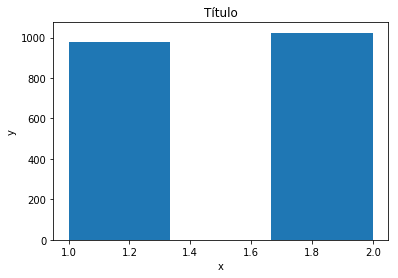

In [39]:
plt.hist(Dades_2019['ID_SEXE'], bins=max(Dades_2019['ID_SEXE']) +1)
plt.title('Título')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

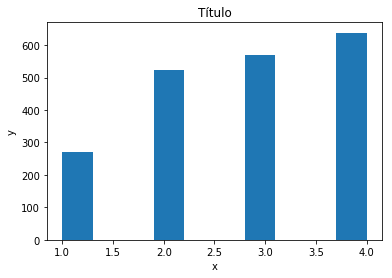

In [40]:
Dades_2019['ID_EDATCOD'].plot(kind='hist')
plt.title('Título')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

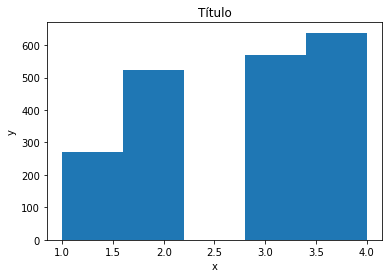

In [41]:
plt.hist(Dades_2019['ID_EDATCOD'], bins=max(Dades_2019['ID_EDATCOD']) +1)
plt.title('Título')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

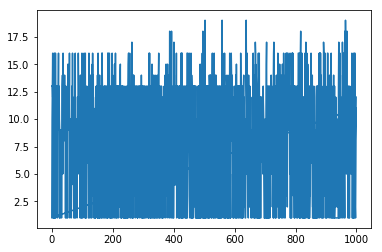

In [42]:
Dades_2019['ID_AUT'].plot()

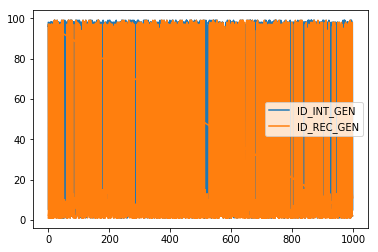

In [43]:
Dades_2019[['ID_INT_GEN', 'ID_REC_GEN']].plot()
plt.show()

In [44]:
#fig, ax = plt.subplots()
#ax.hist('edatcod', bins=5)
#plt.show()

In [45]:
Dades_2019.to_csv('Enquestes2019.csv', sep=';', header=1, encoding='latin-1')